<a href="https://colab.research.google.com/github/wojtwkg/lecture25.03/blob/main/Projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, MultiLabelBinarizer
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor



!wget https://raw.githubusercontent.com/UEPPUM2025/dane/22320832861f7f428f415a91f6b4bf46f63e5f17/taxi_trip_pricing%20.csv

df = pd.read_csv('taxi_trip_pricing (1).csv')

--2025-05-28 09:41:42--  https://raw.githubusercontent.com/UEPPUM2025/dane/22320832861f7f428f415a91f6b4bf46f63e5f17/taxi_trip_pricing%20.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-05-28 09:41:43 ERROR 404: Not Found.



# **1 etap projektu**

In [ ]:
print("First 5 records:", df.head())

First 5 records:    Trip_Distance_km Time_of_Day Day_of_Week  Passenger_Count  \
0             19.35     Morning     Weekday              3.0   
1             47.59   Afternoon     Weekday              1.0   
2             36.87     Evening     Weekend              1.0   
3             30.33     Evening     Weekday              4.0   
4               NaN     Evening     Weekday              3.0   

  Traffic_Conditions Weather  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
0                Low   Clear       3.56         0.80             0.32   
1               High   Clear        NaN         0.62             0.43   
2               High   Clear       2.70         1.21             0.15   
3                Low     NaN       3.48         0.51             0.15   
4               High   Clear       2.93         0.63             0.32   

   Trip_Duration_Minutes  Trip_Price  
0                  53.82     36.2624  
1                  40.57         NaN  
2                  37.27     52.9032  
3  

In [ ]:
df.dtypes

,0
Trip_Distance_km,float64
Time_of_Day,object
Day_of_Week,object
Passenger_Count,float64
Traffic_Conditions,object
Weather,object
Base_Fare,float64
Per_Km_Rate,float64
Per_Minute_Rate,float64
Trip_Duration_Minutes,float64


In [ ]:
nan_counts = df.isnull().sum()

print("NaN counts per column:\n", nan_counts)

NaN counts per column:
 Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [ ]:
le = LabelEncoder()

for column in ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']:
  if column in df.columns:
    df[column] = le.fit_transform(df[column].fillna('0'))

print(df.head())


   Trip_Distance_km  Time_of_Day  Day_of_Week  Passenger_Count  \
0             19.35            3            1              3.0   
1             47.59            1            1              1.0   
2             36.87            2            2              1.0   
3             30.33            2            1              4.0   
4               NaN            2            1              3.0   

   Traffic_Conditions  Weather  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
0                   2        1       3.56         0.80             0.32   
1                   1        1        NaN         0.62             0.43   
2                   1        1       2.70         1.21             0.15   
3                   2        0       3.48         0.51             0.15   
4                   1        1       2.93         0.63             0.32   

   Trip_Duration_Minutes  Trip_Price  
0                  53.82     36.2624  
1                  40.57         NaN  
2                  37.27     52.903

In [ ]:
nan_counts = df.isnull().sum()

print("NaN counts per column:\n", nan_counts)

NaN counts per column:
 Trip_Distance_km         50
Time_of_Day               0
Day_of_Week               0
Passenger_Count          50
Traffic_Conditions        0
Weather                   0
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64


In [ ]:
df.iloc[7]

,7
Trip_Distance_km,43.4400
Time_of_Day,2.0000
Day_of_Week,2.0000
Passenger_Count,3.0000
Traffic_Conditions,0.0000
Weather,1.0000
Base_Fare,2.9700
Per_Km_Rate,1.8700
Per_Minute_Rate,0.2300
Trip_Duration_Minutes,NaN


REplace 0 na najcześciej wystepująca wartość 'Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather'

In [ ]:
for column in ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']:
  if column in df.columns:
    most_frequent_value = df[column].mode()[0]
    df[column] = df[column].replace(0, most_frequent_value)

print(df.head())


   Trip_Distance_km  Time_of_Day  Day_of_Week  Passenger_Count  \
0             19.35            3            1              3.0   
1             47.59            1            1              1.0   
2             36.87            2            2              1.0   
3             30.33            2            1              4.0   
4               NaN            2            1              3.0   

   Traffic_Conditions  Weather  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
0                   2        1       3.56         0.80             0.32   
1                   1        1        NaN         0.62             0.43   
2                   1        1       2.70         1.21             0.15   
3                   2        1       3.48         0.51             0.15   
4                   1        1       2.93         0.63             0.32   

   Trip_Duration_Minutes  Trip_Price  
0                  53.82     36.2624  
1                  40.57         NaN  
2                  37.27     52.903

In [ ]:
for col in ['Trip_Distance_km', 'Passenger_Count', 'Time_of_Day', 'Day_of_Week', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price', 'Traffic_Conditions', 'Weather']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mean())


In [ ]:
nan_counts = df.isnull().sum()

print("NaN counts per column:\n", nan_counts)

NaN counts per column:
 Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64


Sprawdzenie wartości odstających + korelacji


In [ ]:
for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]):
    print(f"Column: {column}")
    print(f"Minimum: {df[column].min()}")
    print(f"Maximum: {df[column].max()}")
    print("-" * 20)


Column: Trip_Distance_km
Minimum: 1.23
Maximum: 146.0670471598387
--------------------
Column: Time_of_Day
Minimum: 1
Maximum: 4
--------------------
Column: Day_of_Week
Minimum: 1
Maximum: 2
--------------------
Column: Passenger_Count
Minimum: 1.0
Maximum: 4.0
--------------------
Column: Traffic_Conditions
Minimum: 1
Maximum: 3
--------------------
Column: Weather
Minimum: 1
Maximum: 3
--------------------
Column: Base_Fare
Minimum: 2.01
Maximum: 5.0
--------------------
Column: Per_Km_Rate
Minimum: 0.5
Maximum: 2.0
--------------------
Column: Per_Minute_Rate
Minimum: 0.1
Maximum: 0.5
--------------------
Column: Trip_Duration_Minutes
Minimum: 5.01
Maximum: 119.84
--------------------
Column: Trip_Price
Minimum: 6.1269
Maximum: 332.0436886774302
--------------------


In [ ]:
#10 największych i 10 najmniejszych wartości z Trip_Distance_km, Base_Fare, Trip_Duration_Minutes, Trip_Price

for column in ['Trip_Distance_km', 'Base_Fare', 'Trip_Duration_Minutes', 'Trip_Price']:
  if column in df.columns:
    print(f"Top 10 largest values for {column}:")
    print(df[column].nlargest(10))
    print(f"Top 10 smallest values for {column}:")
    print(df[column].nsmallest(10))
    print("-" * 20)


Top 10 largest values for Trip_Distance_km:
64     146.067047
302    145.747060
532    139.476515
268    139.062230
616    138.763887
27     138.098328
225    130.809001
835    126.547628
588    122.820191
338    116.667681
Name: Trip_Distance_km, dtype: float64
Top 10 smallest values for Trip_Distance_km:
821    1.23
208    1.25
72     1.27
128    1.34
205    1.45
407    1.53
945    1.54
456    1.56
840    1.64
898    1.64
Name: Trip_Distance_km, dtype: float64
--------------------
Top 10 largest values for Base_Fare:
288    5.00
623    5.00
61     4.99
330    4.99
383    4.99
951    4.99
243    4.97
617    4.97
894    4.97
920    4.97
Name: Base_Fare, dtype: float64
Top 10 smallest values for Base_Fare:
622    2.01
362    2.02
447    2.02
850    2.02
357    2.03
983    2.03
485    2.04
490    2.04
138    2.05
284    2.05
Name: Base_Fare, dtype: float64
--------------------
Top 10 largest values for Trip_Duration_Minutes:
891    119.84
845    119.82
528    119.65
120    119.54
112    

In [ ]:
# Funkcja do identyfikacji wartości odstających
def identify_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers

# Usuń wartości odstające dla wybranych kolumn
selected_columns = ['Trip_Distance_km', 'Base_Fare', 'Trip_Duration_Minutes', 'Trip_Price']
for column in selected_columns:
    if column in df.columns:  # Sprawdź, czy kolumna istnieje w DataFrame
        outliers = identify_outliers(df[column])
        if not outliers.empty:
            print(f"Usuwanie wartości odstających w kolumnie {column}:")
            # Tworzenie maski dla wartości nie będących odstającymi
            mask = ~df[column].isin(outliers)
            # Filtrowanie DataFrame za pomocą maski
            df = df[mask]
        else:
            print(f"Brak wartości odstających w kolumnie {column}")


Usuwanie wartości odstających w kolumnie Trip_Distance_km:
Brak wartości odstających w kolumnie Base_Fare
Brak wartości odstających w kolumnie Trip_Duration_Minutes
Usuwanie wartości odstających w kolumnie Trip_Price:


In [ ]:
# Krok 1: Skalowanie Min-Max
scaler = MinMaxScaler()
columns_to_scale = ['Trip_Distance_km', 'Base_Fare', 'Trip_Duration_Minutes', 'Trip_Price']
scaled_data = scaler.fit_transform(df[columns_to_scale])

# Konwersja do DataFrame ze skalowanymi kolumnami
scaled_df = pd.DataFrame(scaled_data, columns=[f"Scaled_{col}" for col in columns_to_scale])

# Krok 2: PCA z 90% wariancji
pca = PCA(n_components=0.9)
pca_components = pca.fit_transform(scaled_data)

# Tworzenie DataFrame z komponentami PCA
pca_df = pd.DataFrame(pca_components, columns=[f"PCA_{i+1}" for i in range(pca.n_components_)])

# Krok 3: Łączenie wyników
final_df = pd.concat([df, scaled_df, pca_df], axis=1)

# Weryfikacja
print("Wyjaśniona wariancja przez PCA:", np.sum(pca.explained_variance_ratio_))
print("\nPrzykładowe rekordy:")
print(final_df.head())

Wyjaśniona wariancja przez PCA: 0.9498747673971077

Przykładowe rekordy:
   Trip_Distance_km  Time_of_Day  Day_of_Week  Passenger_Count  \
0         19.350000          3.0          1.0              3.0   
1         47.590000          1.0          1.0              1.0   
2         36.870000          2.0          2.0              1.0   
3         30.330000          2.0          1.0              4.0   
4         27.070547          2.0          1.0              3.0   

   Traffic_Conditions  Weather  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
0                 2.0      1.0   3.560000         0.80             0.32   
1                 1.0      1.0   3.502989         0.62             0.43   
2                 1.0      1.0   2.700000         1.21             0.15   
3                 2.0      1.0   3.480000         0.51             0.15   
4                 1.0      1.0   2.930000         0.63             0.32   

   Trip_Duration_Minutes  Trip_Price  Scaled_Trip_Distance_km  \
0             

                       Trip_Distance_km  Time_of_Day  Day_of_Week  \
Trip_Distance_km               1.000000    -0.030690    -0.008617   
Time_of_Day                   -0.030690     1.000000    -0.016616   
Day_of_Week                   -0.008617    -0.016616     1.000000   
Passenger_Count               -0.015770     0.037724     0.021318   
Traffic_Conditions            -0.039444     0.014296     0.023879   
Weather                       -0.005650     0.002731     0.030618   
Base_Fare                      0.038502     0.010296    -0.022787   
Per_Km_Rate                   -0.061410     0.075858    -0.030642   
Per_Minute_Rate               -0.023463    -0.017618     0.005496   
Trip_Duration_Minutes         -0.048277     0.009005     0.012647   
Trip_Price                     0.656173    -0.001219     0.002271   

                       Passenger_Count  Traffic_Conditions   Weather  \
Trip_Distance_km             -0.015770           -0.039444 -0.005650   
Time_of_Day                

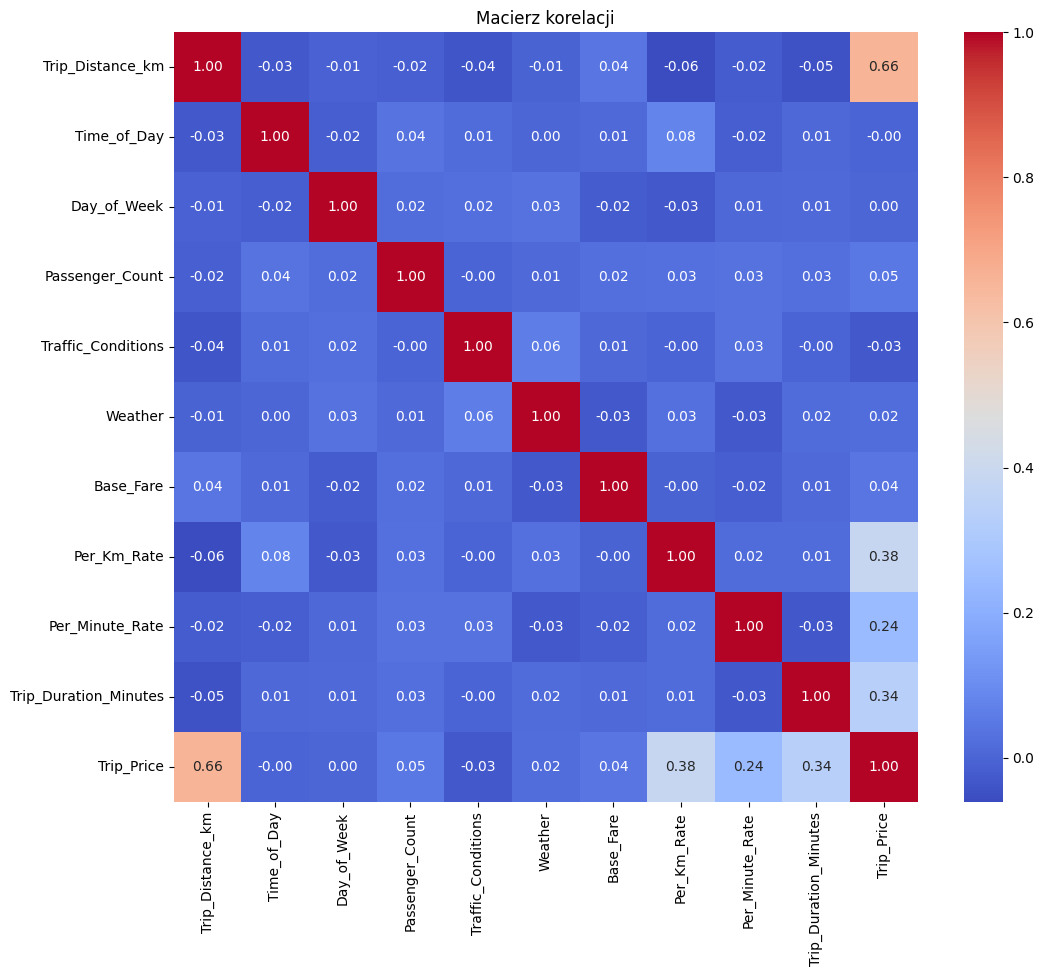

In [ ]:
# Obliczenie i wyświetlenie macierzy korelacji
correlation_matrix = df.corr()
print(correlation_matrix)

# Wizualizacja macierzy korelacji za pomocą heatmapy
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji')
plt.show()

#Kolumny zostaną ewentualnie usunięte już po testach modelu

# **etap 2 - model podstawowy**

In [ ]:
# --- Wyznaczenie danych uczących i testowych przy użyciu walidacji krzyżowej ---

# Uzupełnienie brakujących wartości średnimi (ważne, bo PCA mogło wprowadzić NaN)
final_df = final_df.fillna(final_df.mean())

# Definiowanie cech (X) i zmiennej docelowej (y)
X = final_df.drop('Trip_Price', axis=1)
y = final_df['Trip_Price']

# Użycie prostego modelu regresji liniowej jako modelu bazowego (benchmark)
model = LinearRegression()

# Przygotowanie walidacji krzyżowej - 5 podziałów (5-fold CV)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Ocena modelu za pomocą walidacji krzyżowej, metryka: średni błąd kwadratowy (MSE)
scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Wyświetlenie wyników
print("Wyniki walidacji krzyżowej (negatywne MSE dla każdej foldy):")
print(scores)
print("\nŚrednia jakość modelu (MSE):")
print(-np.mean(scores))

Wyniki walidacji krzyżowej (negatywne MSE dla każdej foldy):
[-120.41339388  -83.57722059  -76.47175454  -92.50413144  -90.83914379]

Średnia jakość modelu (MSE):
92.7611288499143


In [ ]:
# --- Stworzenie i trenowanie modelu bazowego ---

# Wytrenowanie modelu na pełnym zbiorze danych
model.fit(X, y)

# Wyświetlenie współczynników regresji oraz wyrazu wolnego
print("Współczynniki regresji (coef_):", model.coef_)
print("Wyraz wolny (intercept_):", model.intercept_)


Współczynniki regresji (coef_): [ 1.13544786 -0.21957869  0.62161711  0.63177733 -0.29322505  0.44248881
  0.42153263 22.6128731  53.26841948  0.2661939  -2.09442758  0.54498882
 -0.86979888  2.22793784 -0.49861066  0.57520778  0.31325908]
Wyraz wolny (intercept_): -39.54734478317529


In [ ]:
# --- Ocena modelu bazowego za pomocą różnych metryk ---

# Predykcja cen na podstawie wytrenowanego modelu
y_pred = model.predict(X)

# Obliczanie metryk
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
max_err = max_error(y, y_pred)

# Wyświetlanie wyników
print(f"Średni błąd kwadratowy (MSE): {mse:.2f}")
print(f"Pierwiastek z MSE (RMSE): {rmse:.2f}")
print(f"Średni błąd bezwzględny (MAE): {mae:.2f}")
print(f"Współczynnik determinacji: {r2:.2f}")
print(f"Maksymalny błąd predykcji (Max Error): {max_err:.2f}")

Średni błąd kwadratowy (MSE): 89.73
Pierwiastek z MSE (RMSE): 9.47
Średni błąd bezwzględny (MAE): 6.83
Współczynnik determinacji: 0.82
Maksymalny błąd predykcji (Max Error): 43.20


# **etap 3 - Dwa dodatkowe modele do porównania**

In [ ]:
# --- Ustawienia walidacji krzyżowej ---
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# --- Siatki hiperparametrów ---
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

param_grid_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

# --- Random Forest z Grid Search ---
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=cv, scoring='neg_mean_squared_error')
grid_rf.fit(X, y)
rf_best = grid_rf.best_estimator_

# **Wyświetlenie najlepszych hiperparametrów dla Random Forest**
print("\nNajlepsze hiperparametry dla Random Forest:")
print(grid_rf.best_params_)


# --- Gradient Boosting z Grid Search ---
grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=cv, scoring='neg_mean_squared_error')
grid_gb.fit(X, y)
gb_best = grid_gb.best_estimator_

# **Wyświetlenie najlepszych hiperparametrów dla Gradient Boosting**
print("\nNajlepsze hiperparametry dla Gradient Boosting:")
print(grid_gb.best_params_)


# --- Regresja liniowa ---
lr = LinearRegression()

# --- Predykcje przez cross_val_predict ---
y_pred_lr = cross_val_predict(lr, X, y, cv=cv)
y_pred_rf = cross_val_predict(rf_best, X, y, cv=cv)
y_pred_gb = cross_val_predict(gb_best, X, y, cv=cv)

# --- Obliczanie metryk dla każdego modelu ---
def print_metrics(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    max_err = max_error(y_true, y_pred)

    print(f"\n=== {model_name} ===")
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R2: {r2:.2f}")
    print(f"  Max Error: {max_err:.2f}")

# --- Wyświetlenie metryk ---
print_metrics(y, y_pred_lr, "Linear Regression")
print_metrics(y, y_pred_rf, "Random Forest (Best Grid Search)")
print_metrics(y, y_pred_gb, "Gradient Boosting (Best Grid Search)")


Najlepsze hiperparametry dla Random Forest:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

Najlepsze hiperparametry dla Gradient Boosting:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

=== Linear Regression ===
  MSE: 92.76
  RMSE: 9.63
  MAE: 6.93
  R2: 0.81
  Max Error: 45.32

=== Random Forest (Best Grid Search) ===
  MSE: 79.59
  RMSE: 8.92
  MAE: 6.20
  R2: 0.84
  Max Error: 39.62

=== Gradient Boosting (Best Grid Search) ===
  MSE: 70.42
  RMSE: 8.39
  MAE: 5.46
  R2: 0.86
  Max Error: 42.66


Najlepszy wynik osiągnał Gradient Boosting

